In [1]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
@author: franck BARDOL
"""


'\n@author: franck BARDOL\n'

# Reconnaissance Optique de Caractères avec Keras
## OCR : Optical Caracter Recognition

## Objectif : 
Nous allons voir comment apprendre à reconnaître des caractères optiques avec Keras.

Il s'agit de reconnître des chiffres traçés à la main.

Ce type d'application est déployé pour la lecture optique des chèques bancaires par exemple.

Nous allons écrire un **Réseau de neurones à Convolution** afin de reconnaître les caractères manuscrits. 


Le réseau de neurones devra apprendre à lire les chiffres. C'est-à-dire, prédire correctement la valeur du chiffre tracé.


Cela n'a rien d'évident. 
Là où un humain voit une image représentant un chiffre, le réseau ne voit, pour sa part, qu'un ensemble de pixels

## Importation des librairies nécessaires

In [2]:
# ==========================================
#                   MNIST data set
# ==========================================

from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as pl

Using TensorFlow backend.


## Le data-set 
On importe les images du [MNIST](https://en.wikipedia.org/wiki/MNIST_database).
C'est un ensemble de 60,000 images de chiffres en N&B 

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("nb images = ",train_images.shape[0])
print("unique label = ",np.unique(train_labels))

11493376/11490434 [==============================] - 2s 0us/step
nb images =  60000
unique label =  [0 1 2 3 4 5 6 7 8 9]


### Préparation des données
On doit "re-tailler" les images dans un format standard.

Le format attendu est une image de taille 28 pixel sur 28 pixel.

Les images sont Noir & Blanc. On ajoute une dimension supplémentaire pour tenir compte de cette information.

In [4]:
print("dimension data set :" , train_images.shape)

dimension data set : (60000, 28, 28)


### Visualisation de quelques images
Avant de se lancer dans l'écriture d'un modèle de Deep Learning, il est toujours intéressant de **visualiser** les données.

Pour cela, on utilise la librairie *matplotlib*

Lien internet [matplotlib](https://matplotlib.org/)

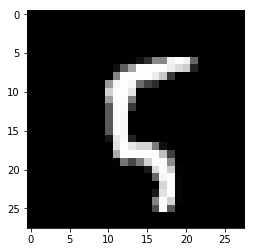

5
c est un :  5


In [5]:
# choix du numéro de l'image 
num_img = 100
pl.figure()
pl.imshow(train_images[num_img,:,:], cmap = pl.get_cmap('gray'))
pl.show()

# quel chiffre ?
print(train_labels[num_img])
num_label = train_labels[num_img]
print("c est un : " , num_label)

### Redimension - Normalisation des images
* On re-dimensionne (*reshape*) pour ajouter **une** dimension.
Si les images étaient en couleur, on devrait alors ajouter **trois** dimensions (RGB : red - green - blue).
* On normalise les images d'origine qui sont encodées sur 255 niveaux de gris. 
Les valeurs des pixels seront donc comprises entre 0 et 1

In [0]:
# re-dimension :
train_images = train_images.reshape((60000, 28, 28, 1))
# normalisation :
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

### One hot encoding des labels 
Les outputs (labels) sont une étiquette (comprise entre 0 et 9) qui représente la valeur du chiffre traçé.
C'est la sortie que le réseau devra apprendre à reconnaitre.

Le *One Hot encoding* est un traitement classique. 

Il consiste à étendre la **dimension** de la sortie.
On passe d'un nombre entre 0 et 9 à un vecteur (tableau) de dimension 9.


Exemple de One Hot Encoding sur des nombres compris entre 0 et 2 : 

0 -> {1 , 0 , 0} 

1 -> {0 , 1 , 0} 

2 -> {0 , 0 , 1} 

Ce traitement facilite l'apprentissage du réseau


In [7]:
train_labels.shape

(60000,)

In [0]:
# One Hot Encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Deep Learning : Convolutionnal Neural Network avec Keras

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))

### Couche  de traitement *flatten* 
Aprés les couches de **convolution**, on doit **toujours** ajouter une couche de traitement **Flatten**.

Cette couche met à plat les structures en 2D issues de la convolution.

La couche *Flatten*  assure le passage 2D -> 1D

In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 16)          2320      
_________________________________________________________________
flatten_1 (Flatten)          (None, 144)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)              

In [13]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### remarque :
l'apprentissage du modèle est lent. 
Vous pouvez l'accélérer en déportant les calculs sur GPU

In [14]:
history = model.fit(train_images, 
          train_labels, 
          validation_split = 0.1,
          epochs = 10, 
          batch_size = 500)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 9s 169us/step - loss: 0.6614 - acc: 0.8065 - val_loss: 0.2471 - val_acc: 0.9273
Epoch 2/10
54000/54000 [==============================] - 2s 31us/step - loss: 0.2478 - acc: 0.9218 - val_loss: 0.1857 - val_acc: 0.9413
Epoch 3/10
54000/54000 [==============================] - 2s 31us/step - loss: 0.1589 - acc: 0.9509 - val_loss: 0.0947 - val_acc: 0.9728
Epoch 4/10
54000/54000 [==============================] - 2s 31us/step - loss: 0.1184 - acc: 0.9631 - val_loss: 0.0861 - val_acc: 0.9753
Epoch 5/10
54000/54000 [==============================] - 2s 30us/step - loss: 0.0952 - acc: 0.9698 - val_loss: 0.0674 - val_acc: 0.9817
Epoch 6/10
54000/54000 [==============================] - 2s 30us/step - loss: 0.0772 - acc: 0.9757 - val_loss: 0.0915 - val_acc: 0.9727
Epoch 7/10
54000/54000 [=========

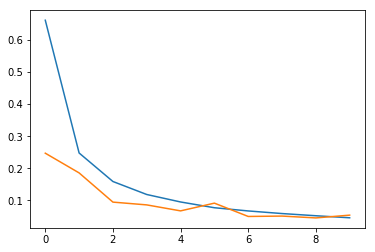

In [15]:
pl.figure()
pl.plot(history.history['loss'])
pl.plot(history.history['val_loss'])

### Exercice
Observez la courbe d'apprentissage.

L'apprentissage s'est-il déroulé correctement selon vous ?

## Performance du modèle 
Accuracy : % d'instances bien classées

In [16]:
# Evaluation
print(model.evaluate(test_images, test_labels))

10000/10000 [==============================] - 1s 70us/step
[0.052603932213317606, 0.9816]
